In [1]:
# prez image stuff
from IPython.display import Image,HTML,Video

In [2]:
import os,sys
sys.path.append('../')
import numpy as np
from keras import backend as K
from keras import layers
from keras.models import Model
from keras.optimizers import SGD
import keras.callbacks
import nrc_ocr.src.ocr_img_train as img_func
from nrc_ocr.src.ocr_img_train import labels_to_text, text_to_labels
import skimage.io
from nrc_ocr.src.ctc_loss import ctc_network_metric as ctc_lambda_func
from nrc_ocr.src.ctc_loss import ctc_metric
import seaborn as sns
from nrc_ocr.src.ctc_decoding import beamsearch_decode
from nrc_ocr.src.clr_callback import CyclicLR
import pylab as plt
%matplotlib inline

if K.backend() == 'tensorflow':
    sess = K.tf.InteractiveSession()

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# change theme

from traitlets.config.manager import BaseJSONConfigManager
path = "/home/thuso/.jupyter/nbconfig/"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "night",
              "transition": "zoom",
                "autolaunch": "true",
              "start_slideshow_at": "selected",})

{'autolaunch': 'true',
 'start_slideshow_at': 'selected',
 'theme': 'night',
 'transition': 'zoom'}

# Optical Character Recognition

## Thuso Simon

# Zoona

# Zambian Identities 

1. Identify consumer 
2. Verify Know You Consumer (KYC) 

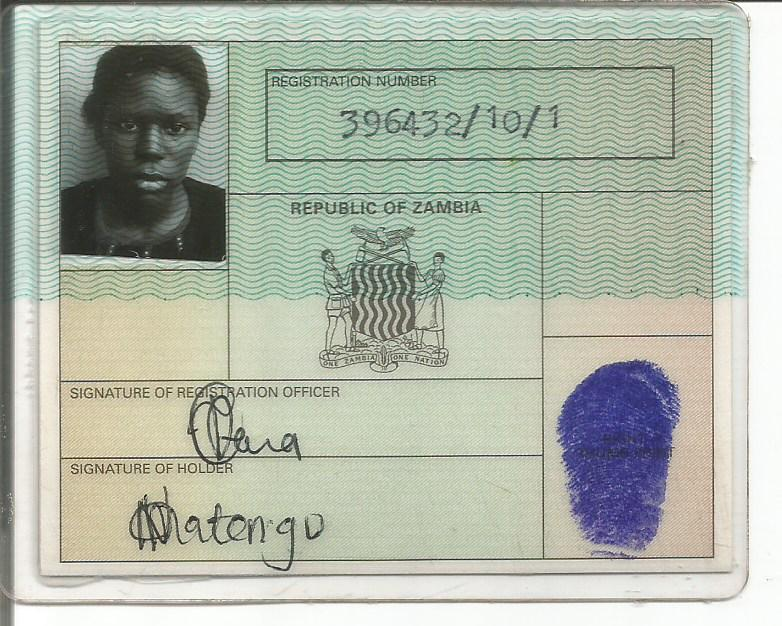

In [4]:
Image('Images/nrc.jpg')

# Naive OCR with Tesseract

In [5]:
def binarize_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
    return gray

def rotate_image(image, degrees):
    rows,cols = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),degrees,1)
    dst = cv2.warpAffine(gray,M,(cols,rows))
    return dst

Tessoract finds: 
 "ATION OFFICER

SIGNATURE OF HE

 

SKENATURE OF HoL"


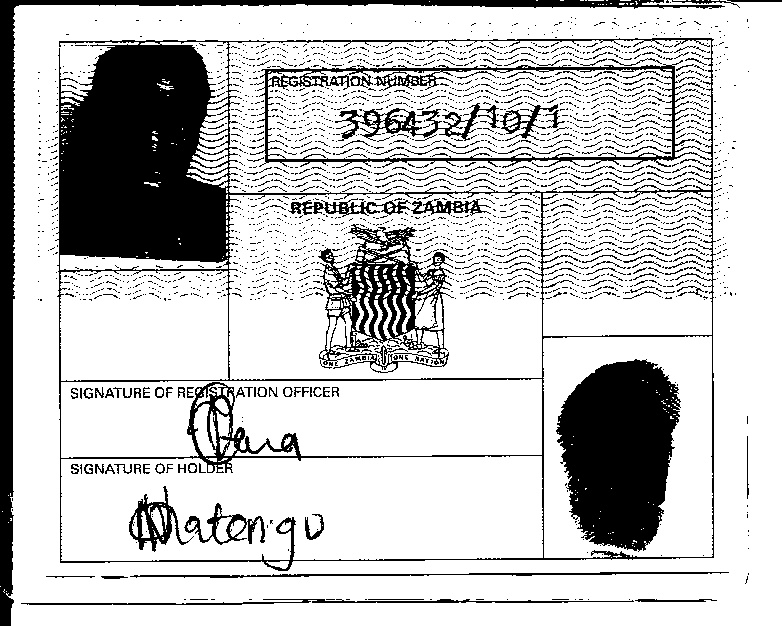

In [6]:
import pytesseract
import PIL 
import cv2

image = cv2.imread('Images/nrc.jpg')
# binarzie
gray = binarize_image(image)
# apply OCR to it
filename = "Images/{}_og.jpg".format(os.getpid())
cv2.imwrite(filename, gray)
text = pytesseract.image_to_string(PIL.Image.open(filename))
print('Tessoract finds: \n "{}"'.format(text))
# show the output images
Image(filename)

## Rotate a bit

Tessoract finds: 
 ""


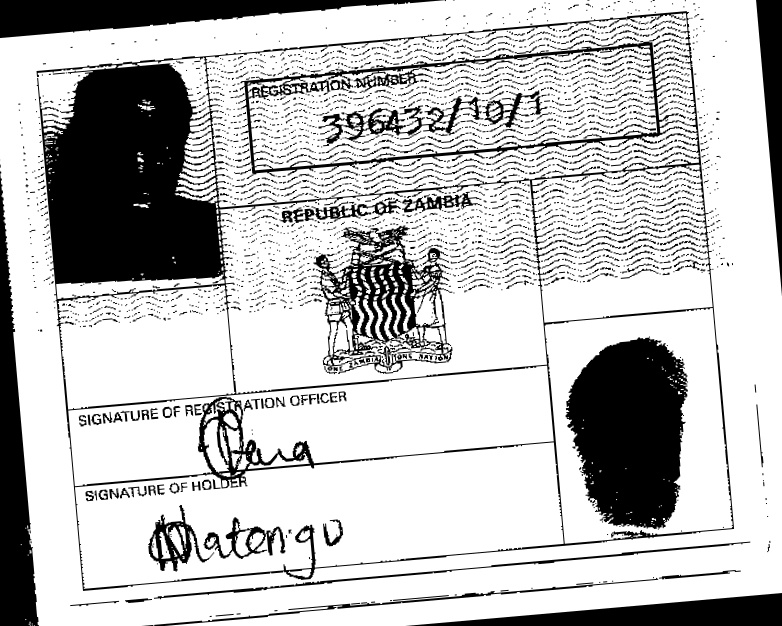

In [7]:
# rotate image
dst = rotate_image(gray, 5)
cv2.imwrite(filename, dst)
text = pytesseract.image_to_string(PIL.Image.open(filename))
print('Tessoract finds: \n "{}"'.format(text))
Image(filename)

# Only ID number

Tessoract finds: 
 ""


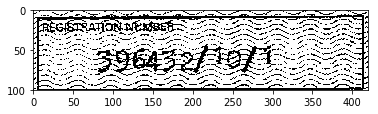

In [8]:
# crop id part
plt.imshow(gray[60:160,260:680],cmap='gray' )
cv2.imwrite(filename, gray[60:160,260:680])
text = pytesseract.image_to_string(PIL.Image.open(filename))
#os.remove(filename)
print('Tessoract finds: \n "{}"'.format(text))

# End-to-End ID OCT

# Non-Deep Learning approaches 

## Templating 

## Hardcoding

# Deep Learning

# CNNs

## Attention OCR